<a href="https://colab.research.google.com/github/NeelNaik29/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Neel-Naik/blob/main/Zomato_Restaurant_Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

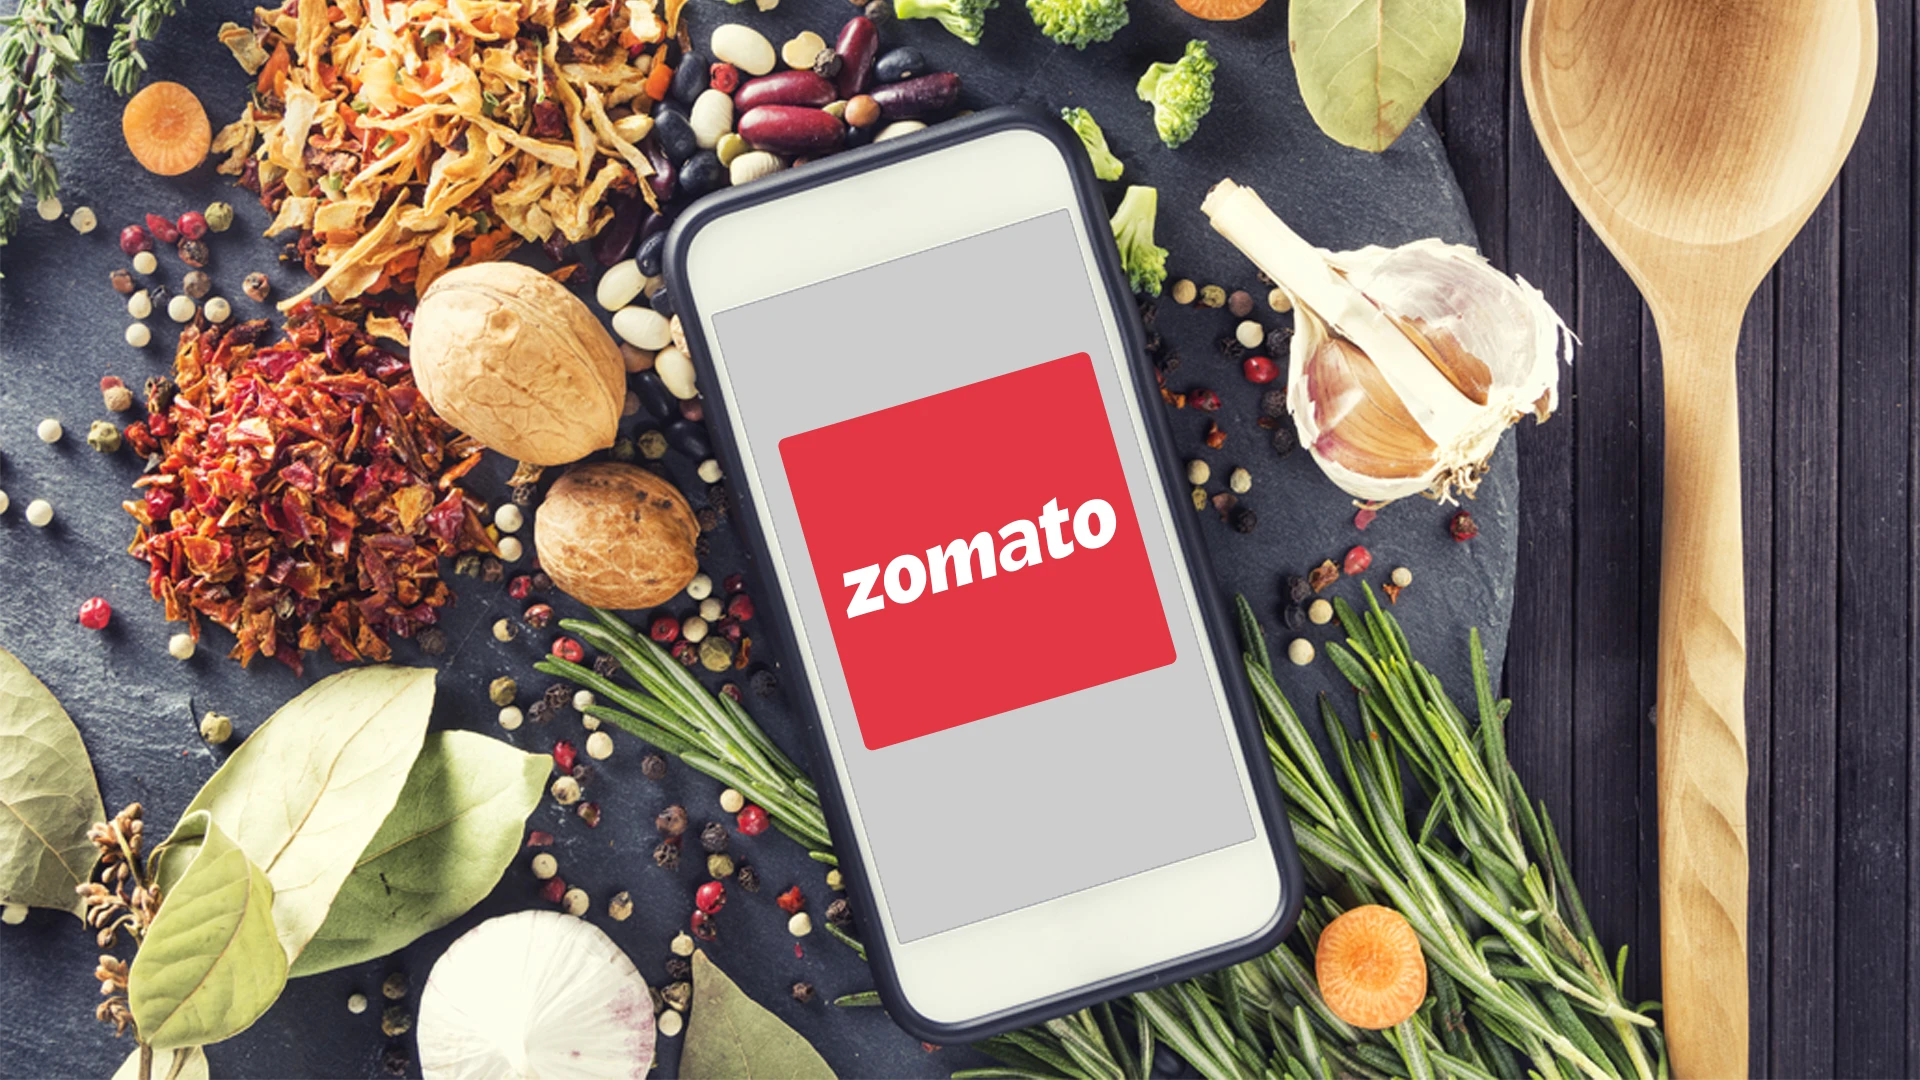

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Created By**      - Neel Naik


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/NeelNaik29/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Neel-Naik

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India. 

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases
that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment
analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint
import math

import plotly.express as px
from matplotlib.pyplot import figure, savefig, show, subplots, Axes, title
import scipy
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.figure_factory as ff
import missingno as msno 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

# default='warn'. suppresing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset of reataurant info and meta data
df_restaurant = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project IV - Zomato Restaurant Clustering And Sentiment Analysis - Neel Naik/Dataset/Zomato Restaurant names and Metadata.csv')

# load Dataset of restaurant reviews
df_reviews = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project IV - Zomato Restaurant Clustering And Sentiment Analysis - Neel Naik/Dataset/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look

print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n' + ' ' * 87 + ' Head ' + ' ' * 87 + '\n')
df_restaurant.head()          #checking 1st 5 rows of the df

print('\n' + ' ' * 87 + ' Tail ' + ' ' * 87 + '\n')
df_restaurant.tail()          #checking last 5 rows of the df



print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n' + ' ' * 87 + ' Head ' + ' ' * 87 + '\n')
df_reviews.head()          #checking 1st 5 rows of the df

print('\n' + ' ' * 87 + ' Tail ' + ' ' * 87 + '\n\n')
df_reviews.tail()          #checking last 5 rows of the df

print('\n' + ' ' * 87 + ' Sample ' + ' ' * 87 + '\n\n')
df_reviews.sample(5)       #checking random 5 rows of the df


........................................................................... Restaurant Names And Metadata ...........................................................................


                                                                                        Head                                                                                        



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."



                                                                                        Tail                                                                                        



,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"




................................................................................ Restaurant Reviews ................................................................................


                                                                                        Head                                                                                        



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0



                                                                                        Tail                                                                                        




,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6



                                                                                        Sample                                                                                        




,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
6811,The Tilt Bar Republic,Dinesh Naidu,"Looking for a cool bar close to work, this is ...",4,"20 Reviews , 10 Followers",4/28/2019 21:54,0
489,Over The Moon Brew Company,Josh Ghosh,OTM - food awesome...Lager awesome..ambience a...,4,"5 Reviews , 5 Followers",4/27/2019 16:49,1
4462,La La Land - Bar & Kitchen,Akshay,Great buffet with top quality bar to be seated...,5,"6 Reviews , 23 Followers",12/18/2018 23:11,0
8167,Delhi-39,Abdul,Yesterday I went with my friend for lunch firs...,4,3 Reviews,5/15/2018 13:33,0
4479,La La Land - Bar & Kitchen,Rahul Gupta,Ambience 3/5\nFood - starters -3.5/5\nSitting ...,3,"145 Reviews , 674 Followers",11/28/2018 23:02,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n'  + ' Shape ' + '\n')

print(f'Rows: {df_restaurant.shape[0]}, Columns: {df_restaurant.shape[1]}\n')  


print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n' + ' Shape '  + '\n')

print(f'Rows: {df_reviews.shape[0]}, Columns: {df_reviews.shape[1]}\n')  


........................................................................... Restaurant Names And Metadata ...........................................................................


 Shape 

Rows: 105, Columns: 6



................................................................................ Restaurant Reviews ................................................................................


 Shape 

Rows: 10000, Columns: 7



### Dataset Information And Description

In [ ]:
# Dataset Info and describe
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n' + ' Info ' + '\n')
df_restaurant.info()          #information about the df

print('\n' + ' Describe ' + '\n')
df_restaurant.describe()      #information about the df


print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n' + ' Info ' + '\n')
df_reviews.info()            #information about the df

print('\n' + ' Describe ' + '\n')
df_reviews.describe()        #information about the df


........................................................................... Restaurant Names And Metadata ...........................................................................


 Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

 Describe 



,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6




................................................................................ Restaurant Reviews ................................................................................


 Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB

 Describe 



,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


#### Duplicate Values

In [ ]:

# Dataset Duplicate Value Count

print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

# To find the duplicate values
print('Total number of duplicate data is :',df_restaurant.duplicated().sum())


print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

# To find the duplicate values
print('Total number of duplicate data is :',df_reviews.duplicated().sum())


........................................................................... Restaurant Names And Metadata ...........................................................................

Total number of duplicate data is : 0


................................................................................ Restaurant Reviews ................................................................................

Total number of duplicate data is : 36


#### Missing Values/Null Values

In [ ]:
def null_value_persentage(df):
  np = pd.DataFrame()

  null_persentage = round((df.isnull().sum()/len(df)) * 100, 2)

  np['Col_name'] = df.columns
  np['%'] = list(round((df.isnull().sum()/len(df)) * 100, 2))

  return np[np['%'] > 0]

In [ ]:
# Missing Values/Null Values Count
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n'+ ' Null Values Count ' + '\n')
df_restaurant.isnull().sum()    #sum of the null values

print('\n\n'  + ' Null Values % '  + '\n')
null_value_persentage(df_restaurant)


print('\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n'+ ' Null Values Count ' + '\n')
df_reviews.isnull().sum()    #sum of the null values

print('\n\n'  + ' Null Values % '  + '\n')
null_value_persentage(df_reviews)


........................................................................... Restaurant Names And Metadata ...........................................................................


 Null Values Count 



Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64



 Null Values % 



,Col_name,%
3,Collections,51.43
5,Timings,0.95



................................................................................ Restaurant Reviews ................................................................................


 Null Values Count 



Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64



 Null Values % 



,Col_name,%
1,Reviewer,0.38
2,Review,0.45
3,Rating,0.38
4,Metadata,0.38
5,Time,0.38



........................................................................... Restaurant Names And Metadata ...........................................................................



<Axes: >

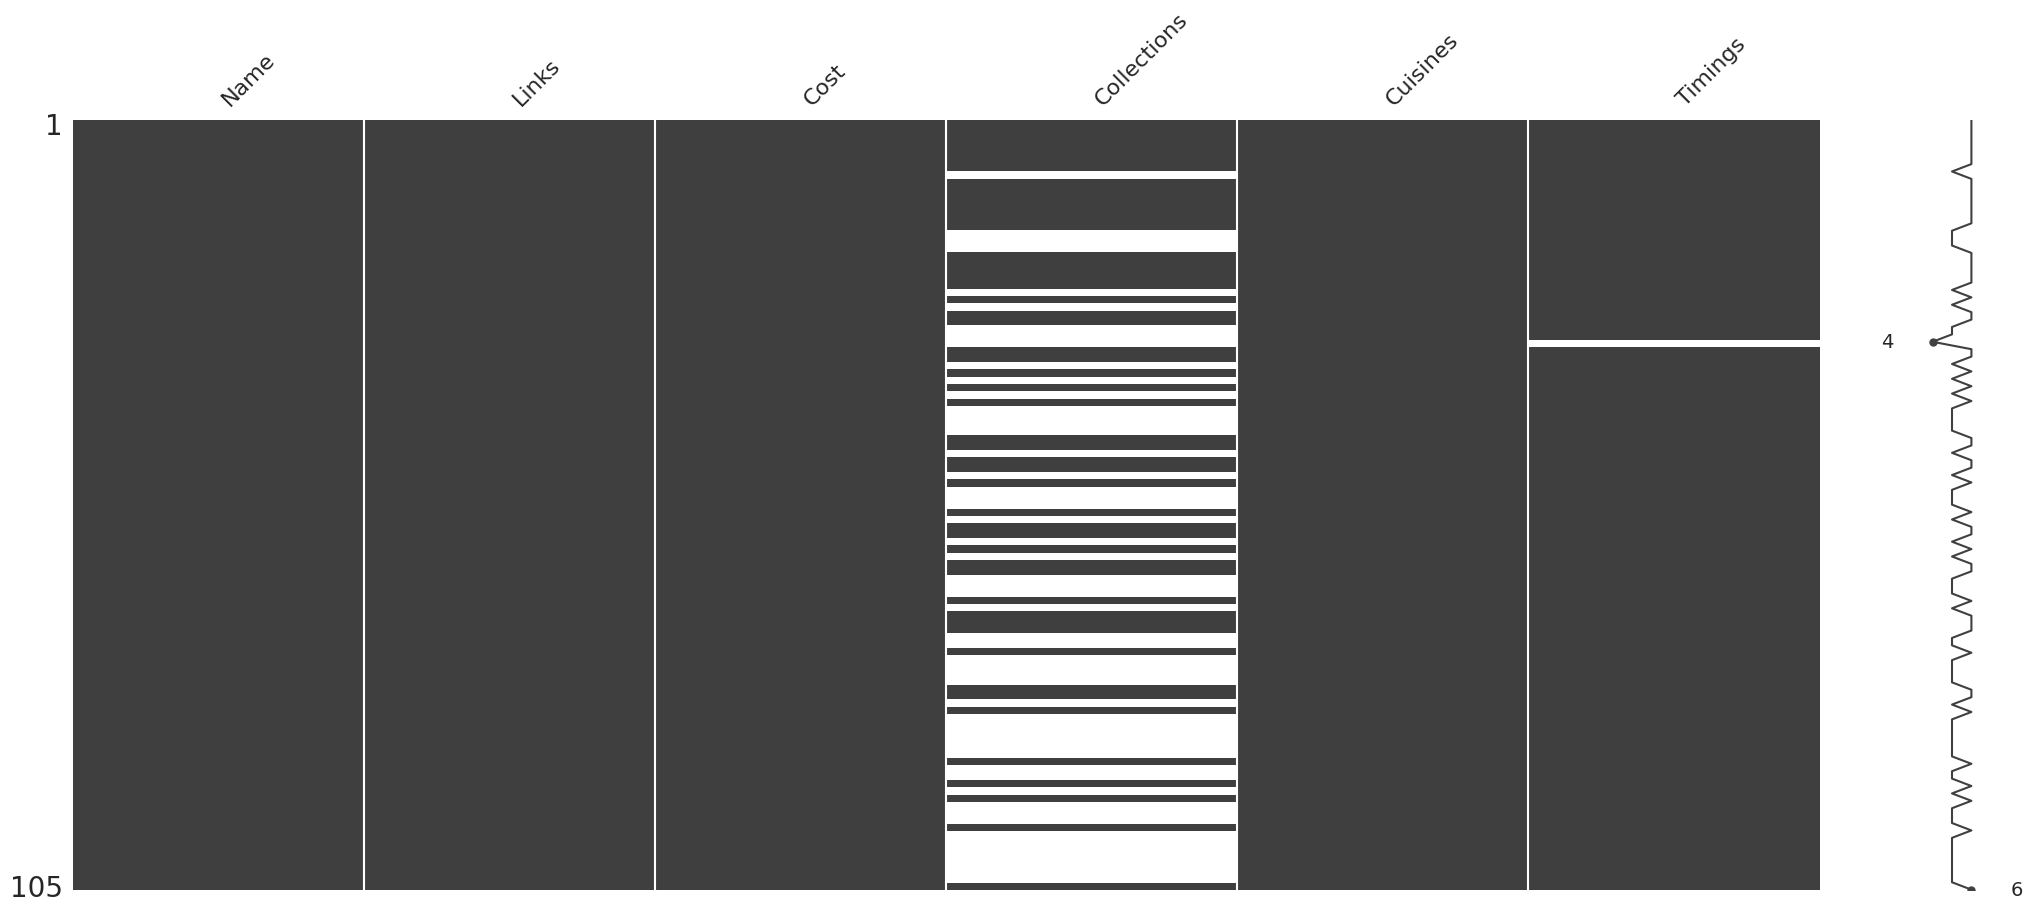

In [ ]:
# Visualizing the missing values
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')
msno.matrix(df_restaurant)


................................................................................ Restaurant Reviews ................................................................................



<Axes: >

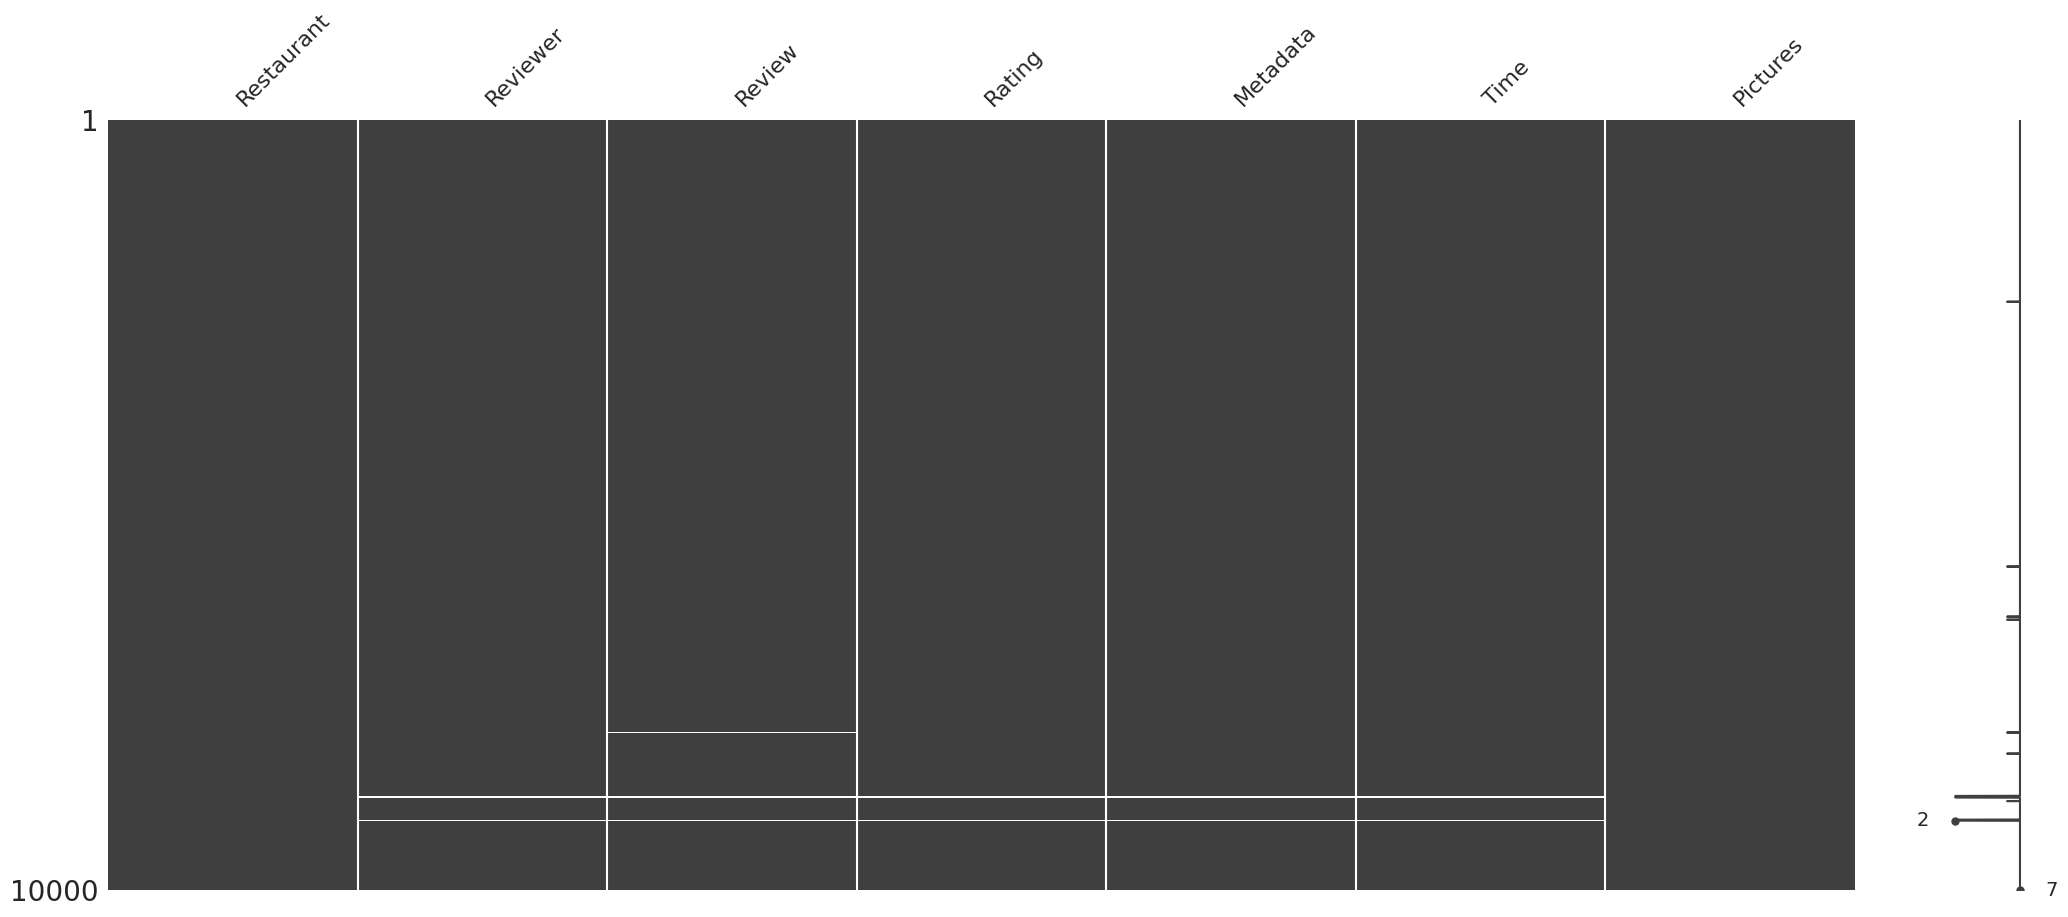

In [ ]:
# Visualizing the missing values
print('\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')
msno.matrix(df_reviews)

In [ ]:
# Retrieve rows where the 'Review' column has null values
df_reviews[df_reviews['Review'].isnull()].head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


### What did you know about your dataset?

#### **Restaurant Names And Metadata**:


*   This Dataset contains information about the 105 restaurants like the cost, timings and Cuisines.
*   All of the columns have data type of object. So we need to Change column 'Cost' to int

*  Column 'Collections' can be droped as it has more than half of its data missing. 

#### **Restaurant Reviews**:


*   This Dataset have 10,000 reviews of the 105 restaurant names from the other dataset.
*  we need to change 'Rating' to float and 'Time' to datetime. Other than that  'Pictures' is in int and other are object datatypes respectively.

*   It has 38 rows which have missing values in the same row index which can be droped as it contributes to less than 1% of the data.









## ***2. Understanding Your Variables***

### Variables Description 

#### **Restaurant Names And Metadata**:

Name: Name of Restaurants

Links: URL Links of Restaurants

Cost: Per person estimated cost of dining

Collection: Tagging of Restaurants w.r.t. Zomato categories

Cuisines: Cuisines served by restaurants

Timings: Restaurant timings

--------------------------

#### **Restaurant Reviews**:

Reviewer: Name of the reviewer

review: Review text

Rating: Rating provided

MetaData: Reviewer metadata-No of reviews and followers

Time: Date and Time of Review

Pictures: No of pictures posted with review.






### Check Unique Values for each variable.

In [ ]:

def unique_values(df):
  # Iterate over columns and print unique values
  for column in df.columns:
      unique_values = df[column].unique()
      print(f"Unique values for {column}:")
      print(unique_values)
      print()


In [ ]:
# Check Unique Values for each variable.
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')
unique_values(df_restaurant)

print('\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')
unique_values(df_reviews)


........................................................................... Restaurant Names And Metadata ...........................................................................

Unique values for Name:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Rest

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# fixing the null values in restaurant df

# Drop the 'Collections' column from the DataFrame
df_restaurant.drop(['Collections'], axis=1, inplace=True)

# Convert the 'Cost' column to int data type
df_restaurant['Cost'] = df_restaurant['Cost'].str.replace(',', '').astype(int)

# Find the mode value for the 'Timings' column
filler = df_restaurant['Timings'].mode()[0]

# Replace NaN values in the 'Timings' column with the mode value
df_restaurant['Timings'] = df_restaurant['Timings'].fillna(filler)

In [ ]:
# Call the function with the 'df_restaurant' DataFrame
null_value_persentage(df_restaurant)

,Col_name,%


In [ ]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


No null values remaining in the DF restaurant



In [ ]:
# fixing the null values in review df

# Find the row indices where 'Reviewer' column is null
null_row_index = df_reviews[df_reviews['Reviewer'].isnull()].index.tolist()

# Drop rows with null values in 'Reviewer' column
df_reviews.drop(null_row_index, inplace=True)

In [ ]:
df_reviews.reset_index(inplace= True, drop = True )

In [ ]:
# Retrieve rows where the 'Review' column has null values
df_reviews[df_reviews['Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8821,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0


In [ ]:
# Replace the 'Like' values in the 'Rating' column with 4
df_reviews['Rating'][df_reviews['Rating'] == 'Like'] = 4

# Convert the 'Rating' column to float data type
df_reviews['Rating'] = df_reviews['Rating'].astype(float)

# Convert the 'Time' column to DateTime data type
df_reviews['Time'] = pd.to_datetime(df_reviews['Time'])

In [ ]:
print('Value count when review = 3\n')
# Count the frequency of reviews for rows where the rating is 3
df_reviews['Review'][df_reviews['Rating'] == 3].value_counts().head()

print('\n\nValue count when review = 5\n')
# Count the frequency of reviews for rows where the rating is 5
df_reviews['Review'][df_reviews['Rating'] == 5].value_counts().head()

Value count when review = 3



good             10
average           3
ok                3
quantity less     2
too oily          2
Name: Review, dtype: int64



Value count when review = 5



good         180
Good          41
nice          22
very good     22
excellent     20
Name: Review, dtype: int64

In [ ]:
# Replace null values in the 'Review' column with 'good'
df_reviews['Review'].fillna('good', inplace=True)

In [ ]:
# Call the function with the 'df_reviews' DataFrame
null_value_persentage(df_reviews)

,Col_name,%


No null values remaining in DF reviews.

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9962 non-null   object        
 1   Reviewer    9962 non-null   object        
 2   Review      9962 non-null   object        
 3   Rating      9962 non-null   float64       
 4   Metadata    9962 non-null   object        
 5   Time        9962 non-null   datetime64[ns]
 6   Pictures    9962 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 544.9+ KB


In [ ]:
# merge both the df on restaurant names to make the EDA easy.
df_restaurant.rename(columns={'Name': 'Restaurant'}, inplace=True)
df = pd.merge(df_reviews, df_restaurant, on = 'Restaurant')

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [ ]:
df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Cuisines,Timings
9957,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9958,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9959,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9960,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
9961,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",2016-05-31 16:41:00,6,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"


In [ ]:
df.shape

(9962, 11)

### What all manipulations have you done and insights you found?

#### For Restaurant DF:

*   Droped the 'Colections' column.
*   Changed DType of 'Cost' column to 'int'.
*   Filled the missing value in 'Timings' coloumn with mode.

#### For Review DF:

*      



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***